# **Downloads and Imports**


In [34]:
!python3 -c "import nltk; nltk.download('all')"

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [2]:
import re
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble 
from sklearn.metrics import confusion_matrix 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

In [4]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_train = pd.read_csv("/content/drive/MyDrive/train.csv")
df_train.head()

,ID,comment,date,down,parent_comment,score,top,topic,user,label
0,uid_590555,"Well, let's be honest here, they don't actuall...",2015-04,0,They should shut the fuck up and let the commu...,2,2,starcitizen,Combat_Wombatz,0
1,uid_671762,"Well, I didn't need evidence to believe in com...",2016-12,-1,You need evidence to kill people? I thought we...,6,-1,EnoughCommieSpam,starkadd,1
2,uid_519689,"Who does an ""official promo"" in 360p?",2013-11,0,2014 BMW S1000R: Official Promo,3,3,motorcycles,phybere,0
3,uid_788362,Grotto koth was the best,2015-09,0,Not really that memorable lol if you want memo...,2,2,hcfactions,m0xyMC,1
4,uid_299252,Neal's back baby,2015-11,0,James Neal hit on Zach Parise,-5,-5,hockey,Somuch101,1


# Data Analysis and Text Preprocessing


In [7]:
df_train.shape

(15000, 10)

In [9]:
df_train.describe()

,down,score,top,label
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,-0.145333,7.194667,5.457600,0.501800
std,0.352448,46.586034,32.236574,0.500013
min,-1.000000,-111.000000,-111.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,2.000000,1.000000,1.000000
75%,0.000000,4.000000,3.000000,1.000000
max,0.000000,2993.000000,1340.000000,1.000000


In [10]:
df_train.drop(['ID', 'date', 'down', 'score', 'top'], axis=1, inplace=True)
df_train.head()

,comment,parent_comment,topic,user,label
0,"Well, let's be honest here, they don't actuall...",They should shut the fuck up and let the commu...,starcitizen,Combat_Wombatz,0
1,"Well, I didn't need evidence to believe in com...",You need evidence to kill people? I thought we...,EnoughCommieSpam,starkadd,1
2,"Who does an ""official promo"" in 360p?",2014 BMW S1000R: Official Promo,motorcycles,phybere,0
3,Grotto koth was the best,Not really that memorable lol if you want memo...,hcfactions,m0xyMC,1
4,Neal's back baby,James Neal hit on Zach Parise,hockey,Somuch101,1


In [11]:
df_train.iloc[0]['comment']

"Well, let's be honest here, they don't actually seem to do much moderating, so they have to spend their time doing *something*."

In [12]:
df_train.iloc[1]['comment']

"Well, I didn't need evidence to believe in communism."

In [13]:
df_train.iloc[2]['comment']

'Who does an "official promo" in 360p?'

In [14]:
df_train['label'].value_counts()

1    7527
0    7473
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sarcasm vs Non-sarcasm')

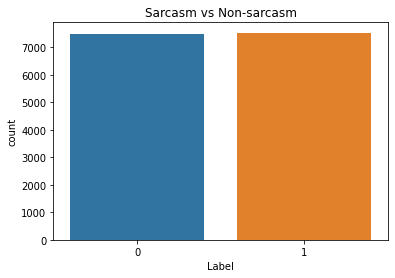

In [15]:
sns.countplot(df_train.label)
plt.xlabel('Label')
plt.title('Sarcasm vs Non-sarcasm')

In [16]:
wordcloud = WordCloud(background_color='black', stopwords = stopwords.words('english'),
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

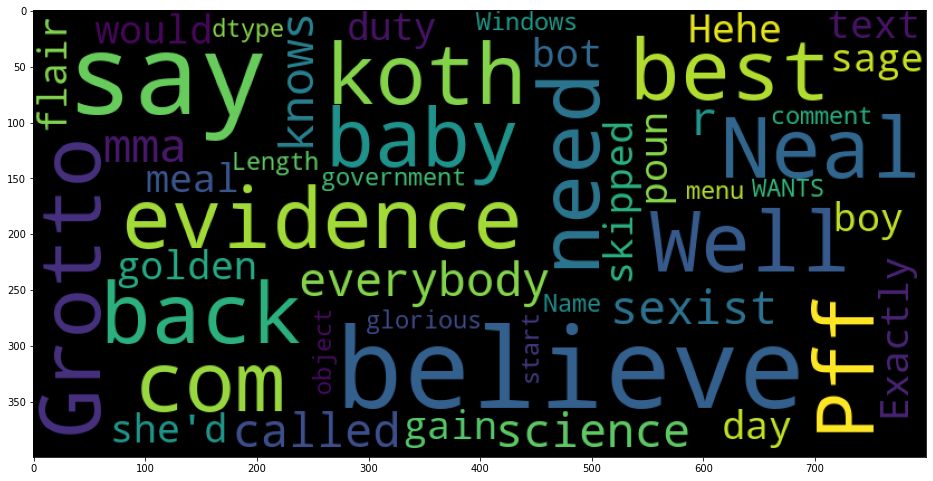

In [17]:
plt.figure(figsize=(16, 12))
wordcloud.generate(str(df_train.loc[df_train['label'] == 1, 'comment']))
plt.imshow(wordcloud);

In [18]:
df_topics = df_train.loc[df_train['label'] == 1]
df_topics_grouped = df_topics.groupby('topic').size().sort_values(ascending=False)
df_topics_grouped[:5]

topic
AskReddit          371
politics           357
worldnews          268
leagueoflegends    195
news               153
dtype: int64

In [19]:
df_train['topic'].value_counts(normalize=True)[:5]

AskReddit          0.062800
politics           0.038133
worldnews          0.026600
leagueoflegends    0.022067
funny              0.019067
Name: topic, dtype: float64

In [20]:
# Top 5 scarcastic users! ;)
df_scarcastic_users = df_topics.groupby('user').size().sort_values(ascending=False)
df_scarcastic_users[:5]

user
Biffingston       11
NeonDisease        5
Gamer_152          4
JumpingJazzJam     4
TodaysIllusion     3
dtype: int64

In [21]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [22]:
def text_preprocessing_fn(text):
    """
    Cleaning and parsing the text.

    """
    #Adding custom stopwords
    stopwords_custom = nltk.corpus.stopwords.words('english')
    newStopWords = ['uh,','uh','yeah','yeah,','um','um,','oh', 'uh-huh', 'uhhuh', "theyre","dont",'huhuh']
    stopwords_custom.extend(newStopWords)

    #Text preprocessing
    text_cleaned = clean_text(text)

    tokenizer = nltk.tokenize.WhitespaceTokenizer()
    tokens = tokenizer.tokenize(text_cleaned)

    remove_stopwords = [w for w in tokens if w not in stopwords_custom and len(w) > 2]

    #Stemming
    #stemmer = nltk.stem.PorterStemmer()
    #processed_text = " ".join(stemmer.stem(token) for token in remove_stopwords)

    #Lemmatization
    lemmatizer = nltk.stem.WordNetLemmatizer()
    processed_text = " ".join(lemmatizer.lemmatize(token, pos='v') for token in remove_stopwords)
    
    combined_text = ''.join(processed_text)
    return combined_text

In [23]:
df_train['comments_preprocessed'] = df_train['comment'].apply(text_preprocessing_fn)
df_train.head(2)

,comment,parent_comment,topic,user,label,comments_preprocessed
0,"Well, let's be honest here, they don't actuall...",They should shut the fuck up and let the commu...,starcitizen,Combat_Wombatz,0,well let honest actually seem much moderate sp...
1,"Well, I didn't need evidence to believe in com...",You need evidence to kill people? I thought we...,EnoughCommieSpam,starkadd,1,well didnt need evidence believe communism


# Model Building - Logistic Regression

In [24]:
sentences = df_train[['comments_preprocessed']].values
y = df_train['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [25]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=50000)
vectorizer.fit(sentences_train.ravel())

X_train = vectorizer.fit_transform(sentences_train.ravel())
X_test  = vectorizer.transform(sentences_test.ravel())

In [26]:
logit = LogisticRegression(C=1, n_jobs=4, solver='lbfgs', 
                           random_state=17, verbose=1)

In [27]:
logit.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(C=1, n_jobs=4, random_state=17, verbose=1)

In [28]:
predictions = logit.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1904
           1       0.63      0.60      0.62      1846

    accuracy                           0.63      3750
   macro avg       0.63      0.63      0.63      3750
weighted avg       0.63      0.63      0.63      3750



In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("True Negatives : ", tn)
print("True Positives : ", tp)

print("False Negatives : ", fn)
print("False Positives : ", fp)

True Negatives :  1238
True Positives :  1116
False Negatives :  730
False Positives :  666


# SVM

In [30]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [31]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1904
           1       0.64      0.59      0.61      1846

    accuracy                           0.63      3750
   macro avg       0.63      0.63      0.63      3750
weighted avg       0.63      0.63      0.63      3750



In [32]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("True Negatives : ", tn)
print("True Positives : ", tp)

print("False Negatives : ", fn)
print("False Positives : ", fp)

True Negatives :  1275
True Positives :  1095
False Negatives :  751
False Positives :  629
